Machine learning Minor Project:
Perform regression analysis to predict the real estate prices by taking all the input parameters(multi linear regression).
Also plot visuals by using Matplotlib/Seaborn data visualization comparing the different features of the input parameters and do Exploratory data analysis (EDA) by using pandas.

MULTILINEAR REGRESSION

In [45]:
#Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [46]:
#Importing the data and taking a look at it
data = pd.read_csv("C:/Users/sathyalakshmi.s/Documents/New folder/Real_estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [47]:
data.shape

(414, 8)

In [48]:
data.size

3312

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [52]:
data['Y house price of unit area'][2]

47.3

In [53]:
#displays the first five rows of the data
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [54]:
data['Y house price of unit area']

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [55]:
#price of the most expensive house
data['Y house price of unit area'].max()

117.5

In [56]:
#price of the most cheap house
data['Y house price of unit area'].min()

7.6

In [57]:
#most old house
data['X2 house age'].max()

43.8

In [58]:
#most new house
data['X2 house age'].min()

0.0

In [59]:
#maximum number of convinient stores available near a house
data['X4 number of convenience stores'].max()

10

In [60]:
#minimum number of convinient stores available near a house
data['X4 number of convenience stores'].min()

0

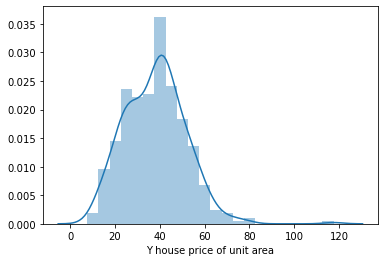

In [61]:
sn.distplot(data['Y house price of unit area'])
plt.show()

In [62]:
#data cleaning 
house_numeric = data.select_dtypes(include = ['float64','int64'])  
house_numeric

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [63]:
house_numeric.shape

(414, 8)

In [64]:
house_numeric = house_numeric.drop(['No'], axis = 1)   #drop the unwanted values 
house_numeric.head() 

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [65]:
house_numeric.shape

(414, 7)

In [66]:
house_numeric

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [67]:
X = house_numeric.iloc[:,0:6].values
Y = house_numeric.iloc[:,6].values

In [68]:
#(test_size = 0.2)
# random_state is basically used for reproducing your problem the same every time it is run. 
# If you do not use a random_state in train_test_split,
#  every time you make the split you might get a different set of train and test data points
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [69]:
X.shape

(414, 6)

In [70]:
X_train.shape

(310, 6)

In [71]:
X_test.shape

(104, 6)

In [72]:
Y_train.shape

(310,)

In [73]:
Y_test.shape

(104,)

In [74]:
from sklearn.linear_model import LinearRegression  #imported the model from the package and family library 
model = LinearRegression() #called the model 
model.fit(X_train,Y_train)    #fitting the model / mapping inputs with outputs / training a machine 
Y_pred = model.predict(X_test)  #predicting the output 
Y_pred

array([39.77553366, 13.17464404, 42.60236133, 12.97950622, 42.73500839,
       40.44929328, 41.25851582, 33.92786512, 50.03454779, 46.38521155,
       46.46910747, 41.01122834, 39.19970453, 40.59919198, 47.16603031,
       38.77258549, 40.70294332, 40.73780768, 41.00822713, 42.74143464,
       49.77941948, 31.48395857, 39.66799459, 45.71759304, 46.26133491,
       43.75626466, 47.18350034, 25.96187857, 48.44464107, 21.75445237,
       45.5554519 , 35.46196014, 42.29276595, 38.95327294, 44.36091261,
       32.90815613, 48.24749509, 39.9622292 , 52.79708247,  7.19700255,
       53.33284997, 33.10682152, 34.04725912, 50.50642749, 15.77538222,
       43.95924793, 42.51688474, 12.86179952, 34.31696765, 49.32138204,
       54.49036707, 38.75491207, 48.02711608, 25.8183059 , 31.01389302,
       34.43186513, 49.2062856 , 40.9899754 , 43.62071235, 33.10353472,
       44.67446259, 44.46386412, 39.45220639, 47.23776745, 36.96463449,
       30.22144453,  9.47329974, 35.44989063, 45.94534296, 40.44

In [75]:
Y_test 

array([45.3, 14.4, 46. , 15.6, 50.2, 38.1, 48.5, 41.4, 51.6, 40.1, 42. ,
       42.4, 28.5, 39.1, 53.7, 36.8, 40.6, 55.2, 39.3, 44.3, 53.5, 25.3,
       22.8, 51.7, 45.5, 34.4, 31.6, 25.9, 49.5, 24.7, 51.7, 29.7, 45.4,
       50.5, 26.5, 30.1, 46.1, 28.9, 54.4, 15. , 44.9, 29.8, 23.6, 48. ,
       16.7, 40.9, 40.2, 12.9, 21.3, 62.1, 63.9, 40.3, 42.2, 19.1, 28.4,
       28.5, 60.7, 37.5, 39.3, 28.8, 42.3, 44.3, 42.6, 57.4, 42.2, 25.7,
       13.2, 27. , 56.2, 38.3, 20.8, 43.1, 78.3, 20.9, 32.5, 33.4, 32.1,
       19.2, 53. , 38.2, 46.7, 24.6, 36.2, 23.2, 29.3, 38.4, 37.5, 34.3,
       44.8, 54.4, 37.9,  7.6, 29.5, 25.3, 13.7, 30. , 30.8, 40.6, 20.7,
       40.8, 55.3, 40.5, 40.8, 40.3])

In [76]:
from sklearn.metrics import r2_score 
r2_score(Y_test,Y_pred)

0.5827152586478487

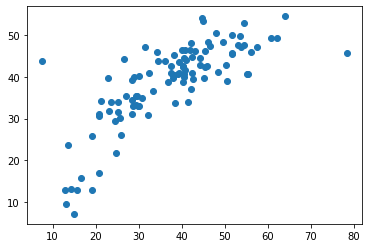

In [77]:
plt.scatter(Y_test,Y_pred) 

In [78]:
data1 = pd.DataFrame({'Actual Data':Y_test, 'Predicted Data': Y_pred})
data1

,Actual Data,Predicted Data
0,45.3,39.775534
1,14.4,13.174644
2,46.0,42.602361
3,15.6,12.979506
4,50.2,42.735008
...,...,...
99,40.8,46.331466
100,55.3,40.737808
101,40.5,40.022384
102,40.8,41.664432


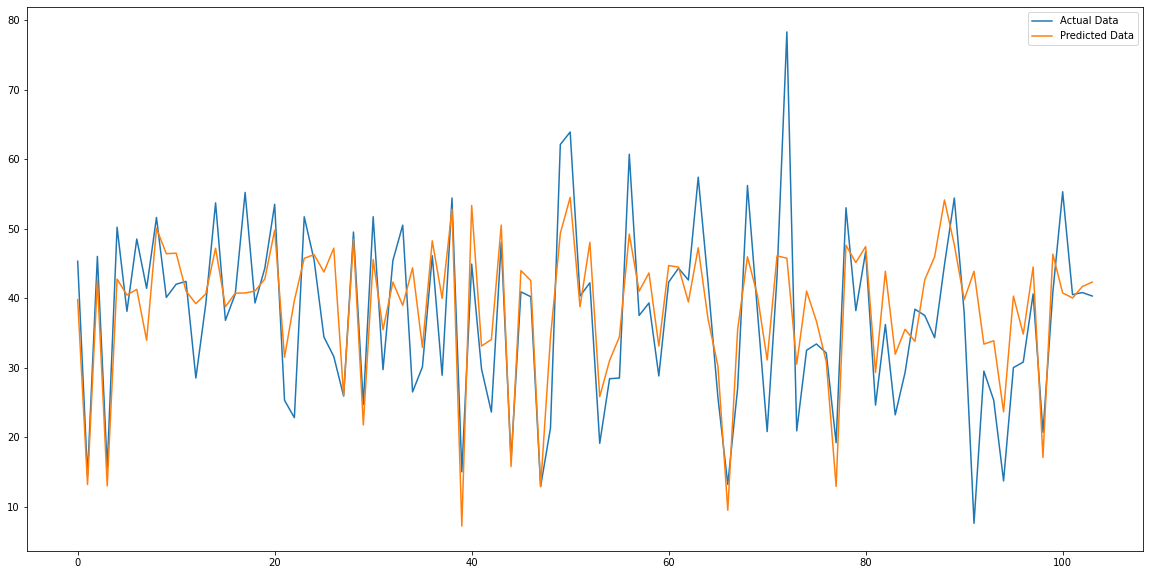

In [79]:
#we create a dataframe with these two columns only for pandas plotting 
data1.plot(figsize=(20,10))
plt.show()

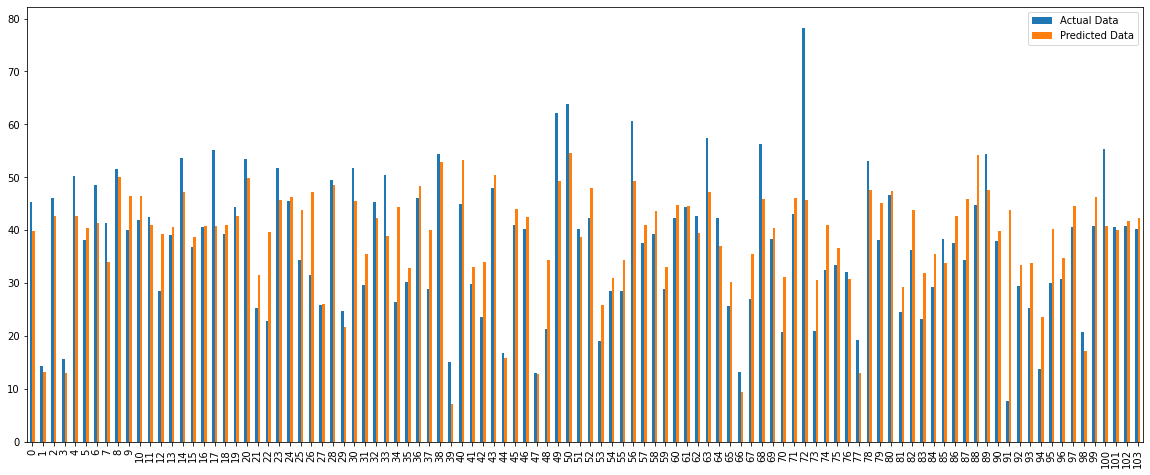

In [80]:
data1.plot(figsize=(20,8), kind = 'bar')

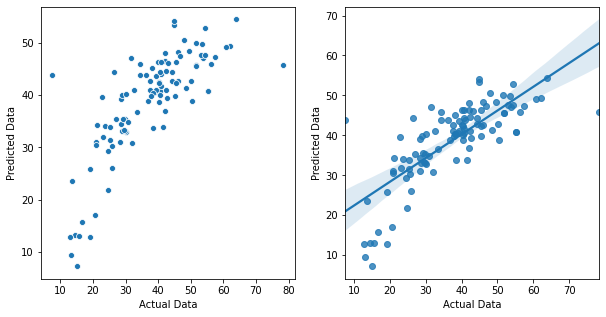

In [82]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sn.scatterplot(x='Actual Data', y = 'Predicted Data', data = data1)

plt.subplot(1,2,2)
sn.regplot(x='Actual Data', y = 'Predicted Data', data = data1)

DATA VISUALIZTION 

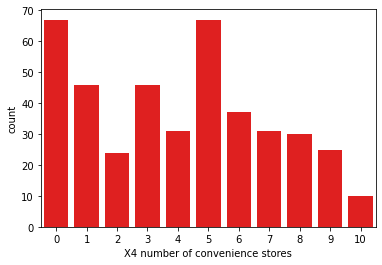

In [84]:
#shows the count of observations
sn.countplot(x = 'X4 number of convenience stores', data = data, color = 'r') 


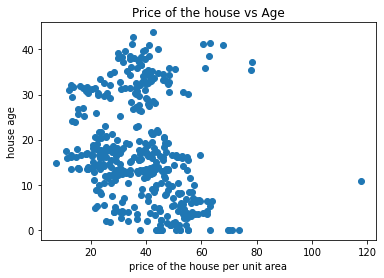

In [85]:
#How is age of the house and price of the house related
plt.scatter(data['Y house price of unit area'],data['X2 house age'])
plt.title("Price of the house vs Age")
plt.xlabel("price of the house per unit area")
plt.ylabel("house age")
plt.show()

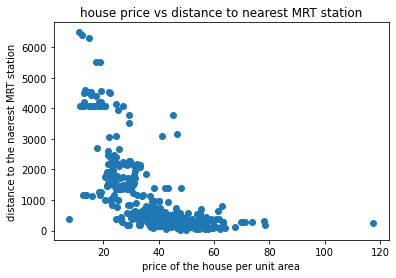

In [86]:
#are houses near  to the MRT station costly 
#we get to know this by plotting a graph with the price of the house and the distance to the MRT station
plt.scatter(data['Y house price of unit area'],data['X3 distance to the nearest MRT station'])
plt.title("house price vs distance to nearest MRT station")
plt.xlabel("price of the house per unit area")
plt.ylabel("distance to the naerest MRT station")
plt.show()
#this scatter plots tell that the houses near to the MRT station are little costly and the ones far are cheap.

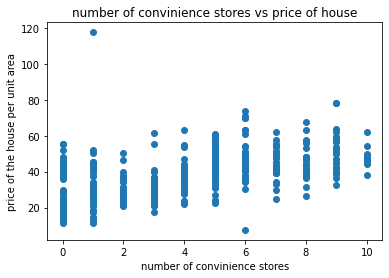

In [87]:
#are houses near to more number of convinient stores are costly 
#we get to know this by plotting a graph with the price of the house and the number of convinient stores near the house
plt.scatter(data['X4 number of convenience stores'],data['Y house price of unit area'])
plt.title("number of convinience stores vs price of house")
plt.xlabel("number of convinience stores")
plt.ylabel("price of the house per unit area")
plt.show()
#this scatter plots tell that the houses near to more convinient stores are little costly and the ones having less stores near by are cheap.

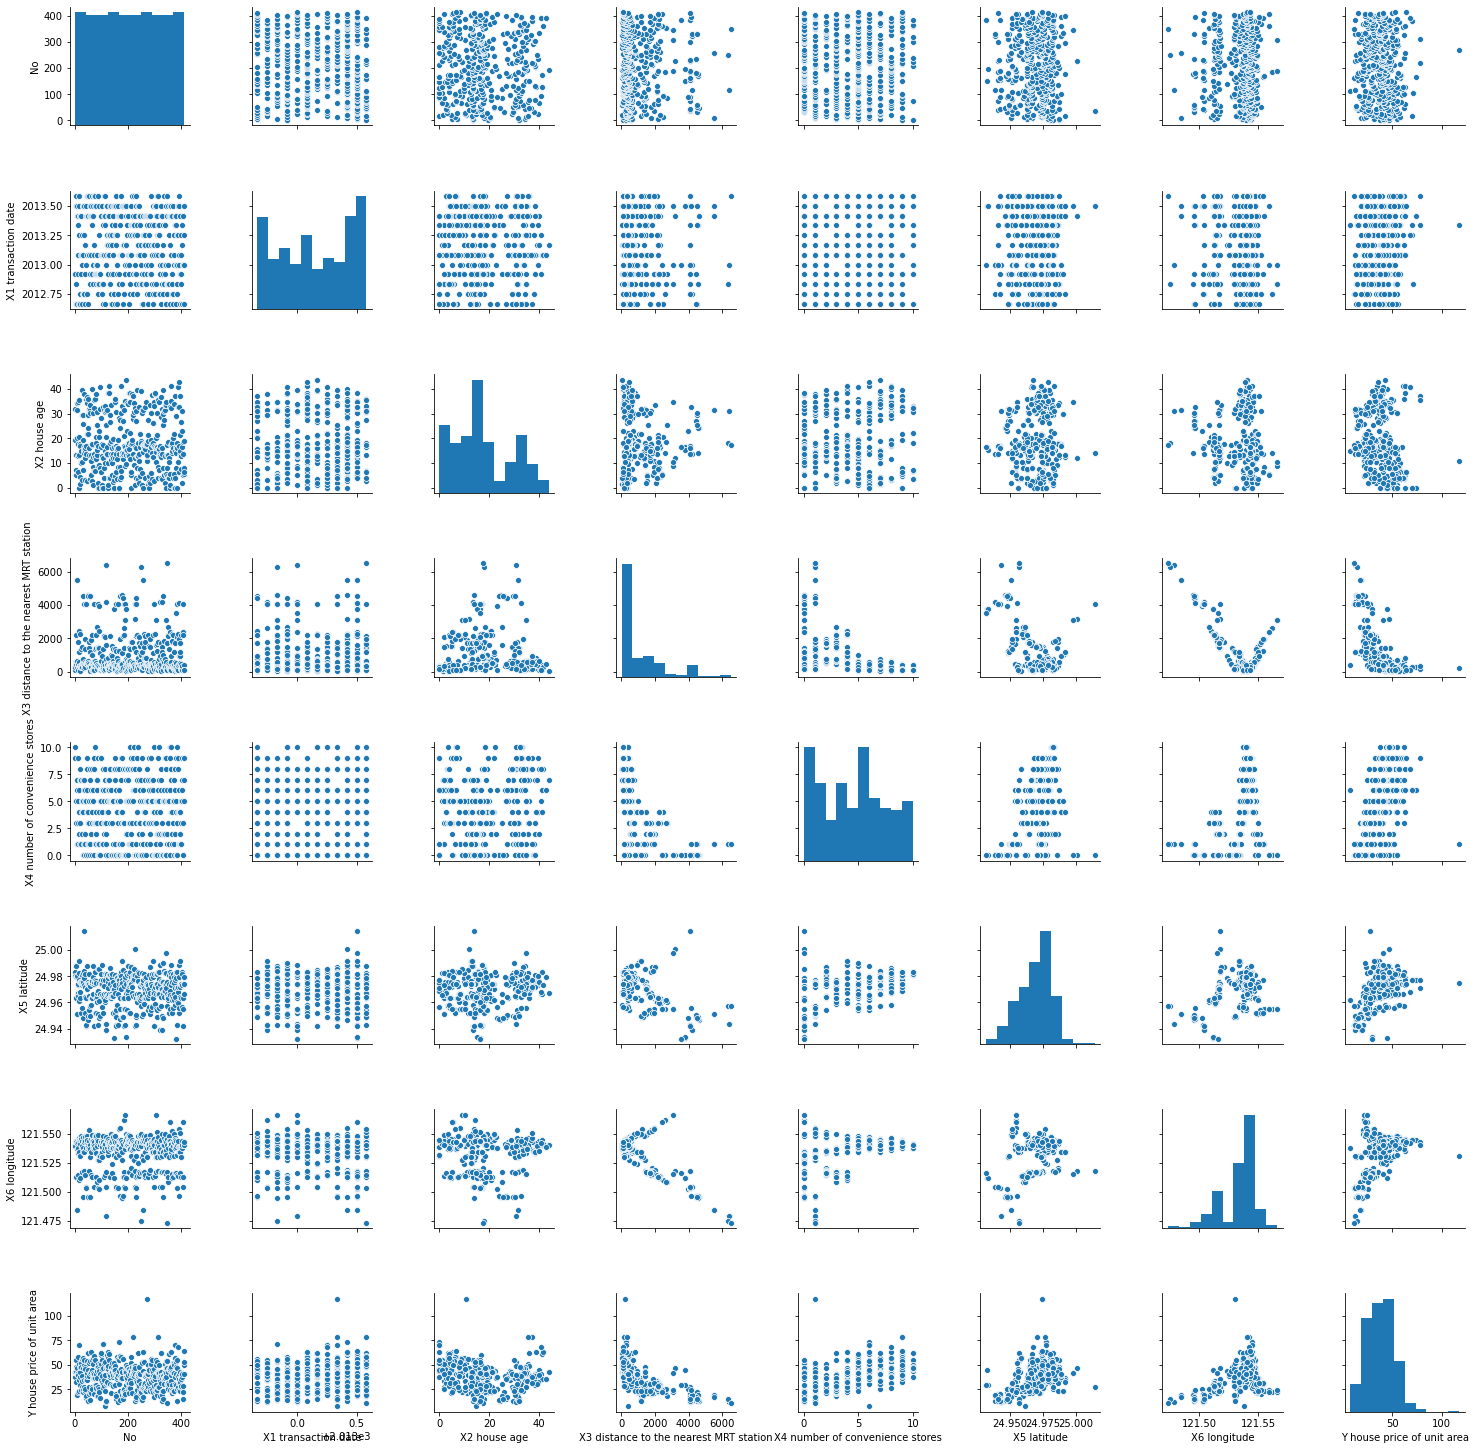

In [90]:
#this plots multiple possible plots with all the combinations from the dataset
sn.pairplot(data)

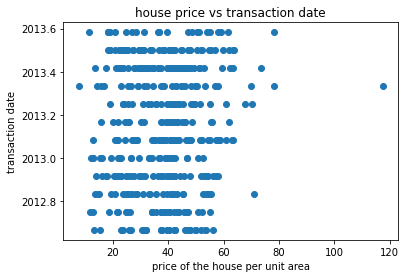

In [91]:
plt.scatter(data['Y house price of unit area'],data['X1 transaction date'])
plt.title("house price vs transaction date")
plt.xlabel("price of the house per unit area")
plt.ylabel("transaction date")
plt.show()

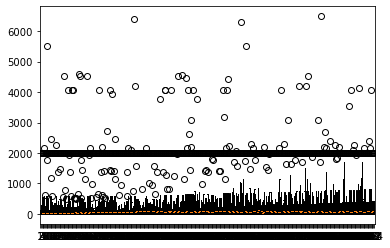

In [92]:
plt.boxplot(data)
plt.show()

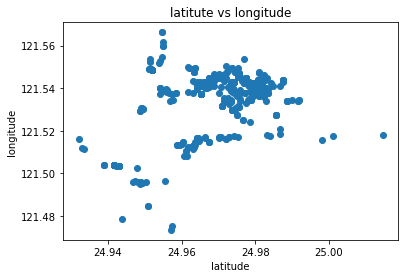

In [93]:
#how houses are placed depending on the latitude and longitude
plt.scatter(data['X5 latitude'],data['X6 longitude'])
plt.title("latitute vs longitude")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

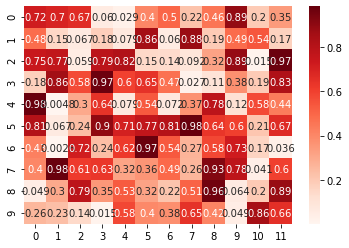

In [94]:
#HEATMAPS 
uniform_data = np.random.rand(10,12)
sn.heatmap(uniform_data, cmap='Reds',annot=True)

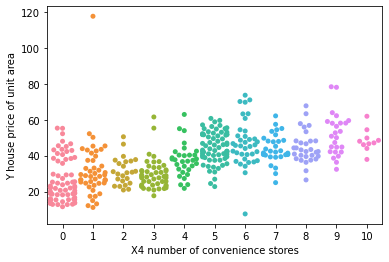

In [95]:
#to summarize the data graphically
#data representation of number of convinient stores and house price
sn.swarmplot(x='X4 number of convenience stores',y= 'Y house price of unit area',data = data)

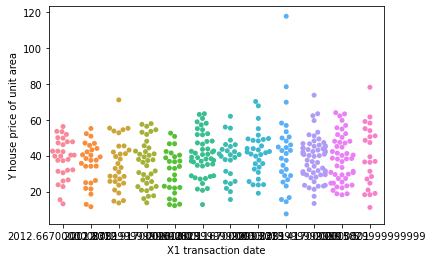

In [96]:
#to summarize the data graphically
#data representation of transaction date and house price
sn.swarmplot(x='X1 transaction date',y= 'Y house price of unit area',data = data)

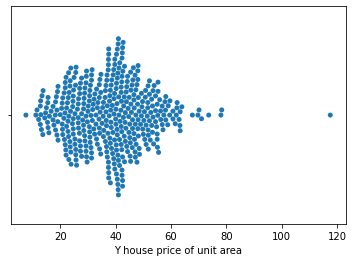

In [97]:
#This graph tells us that price of most of the houses in between 20 to 80 per unit area
sn.swarmplot(x = 'Y house price of unit area',data=data)

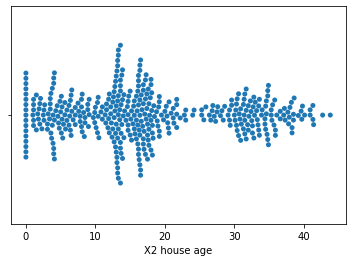

In [98]:
#This graph tells us about the age of the house 
#most of the houses are in between 10 and 20
sn.swarmplot(x = 'X2 house age',data=data)

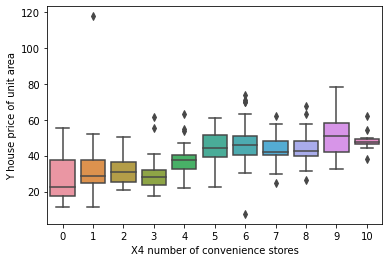

In [99]:
#multiple box plots
#to compare between two groups
#to compare number of convinient stores and the price of the house
sn.boxplot(x='X4 number of convenience stores', y ='Y house price of unit area',data=data)

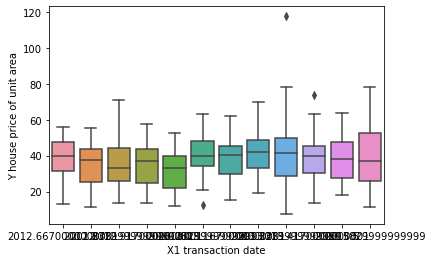

In [100]:
#multiple box plots
#to compare between two groups
#to compare the transaction date and the house price
sn.boxplot(x='X1 transaction date', y ='Y house price of unit area',data=data)

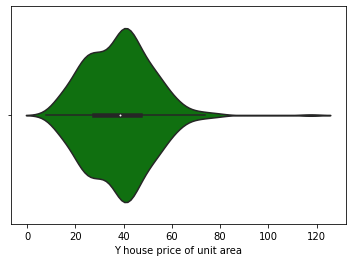

In [101]:
sn.violinplot(x=data['Y house price of unit area'],color ='green')

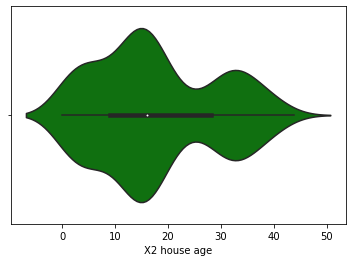

In [102]:
sn.violinplot(x=data['X2 house age'],color ='green')

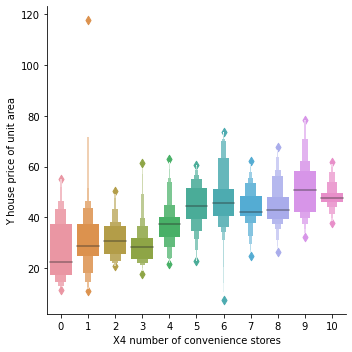

In [103]:
sn.catplot(x='X4 number of convenience stores', y ='Y house price of unit area',data=data, kind = 'boxen')

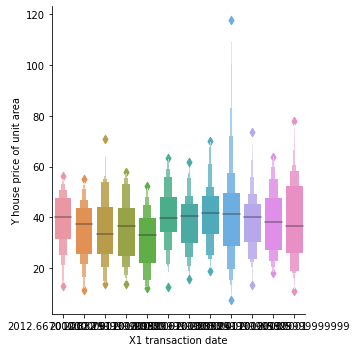

In [104]:
sn.catplot(x='X1 transaction date',y= 'Y house price of unit area',data=data, kind = 'boxen')

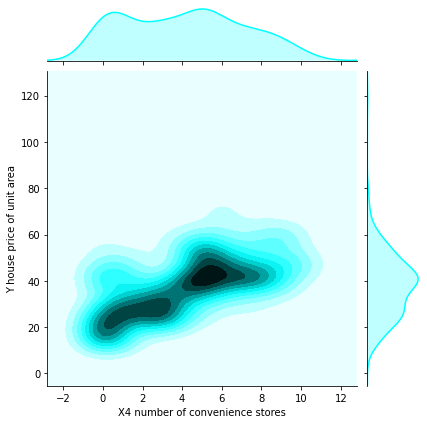

In [105]:
sn.jointplot(x='X4 number of convenience stores', y ='Y house price of unit area', data=data,color ='cyan',kind='kde')

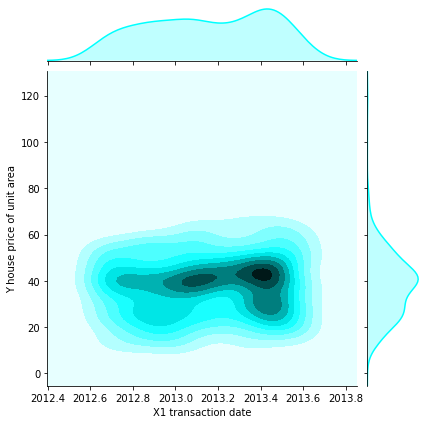

In [106]:
sn.jointplot(x='X1 transaction date',y= 'Y house price of unit area', data=data,color ='cyan',kind='kde')

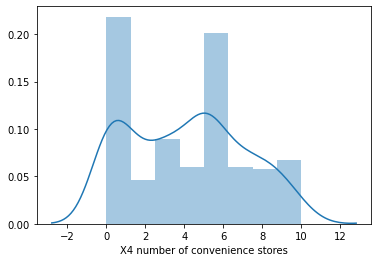

In [107]:
#distribution plot
sn.distplot(data['X4 number of convenience stores'])

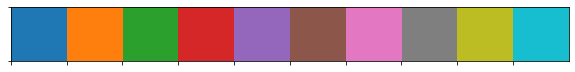

In [108]:
#to display all the olors in the pallet
cols = sn.color_palette()
sn.palplot(cols)

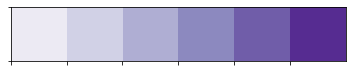

In [109]:
sn.palplot(sn.color_palette("Purples"))

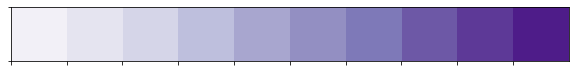

In [110]:
sn.palplot(sn.color_palette("Purples",10))

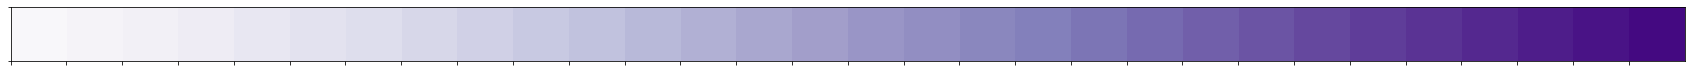

In [111]:
sn.palplot(sn.color_palette("Purples",30))

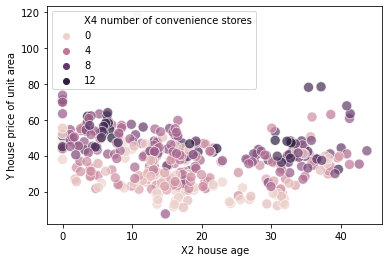

In [112]:
#this is a plot with three constraints being considered
#the three constraints are house age,house price,number of convenience stores
sn.scatterplot(x='X2 house age',y ='Y house price of unit area',data = data, alpha=0.7,s=100, hue = 'X4 number of convenience stores')

EXPLORATORY DATA ANALYSIS(EDA) USING PANDAS


In [113]:
#tells us that its a pandas dataframe
type(data)

pandas.core.frame.DataFrame

In [114]:
#total count of null values in the dataframe
a = data.isnull().sum()
a

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [115]:
#drops all the null values in the dataframe
data.dropna()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [116]:
#no of unique values in the dataframe
data.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [117]:
#prints the first 5 values of the dataframe
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [118]:
#prints the first 10 values in the dataframe
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [119]:
#prints the first 10 values in the dataframe
data.head(15)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [120]:
#print the last 5 values in the dataframe
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [121]:
#print the last 10 values in the dataframe
data.tail(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
404,405,2013.333,16.4,289.32480,5,24.98203,121.54348,41.2
405,406,2012.667,23.0,130.99450,6,24.95663,121.53765,37.2
406,407,2013.167,1.9,372.13860,7,24.97293,121.54026,40.5
407,408,2013.000,5.2,2408.99300,0,24.95505,121.55964,22.3
408,409,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [122]:
#print the last 15 values in the dataframe
data.tail(15)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
399,400,2012.917,12.7,170.12890,1,24.97371,121.52984,37.3
400,401,2013.250,26.8,482.75810,5,24.97433,121.53863,35.5
401,402,2013.083,7.6,2175.03000,3,24.96305,121.51254,27.7
402,403,2012.833,12.7,187.48230,1,24.97388,121.52981,28.5
403,404,2012.667,30.9,161.94200,9,24.98353,121.53966,39.7
404,405,2013.333,16.4,289.32480,5,24.98203,121.54348,41.2
405,406,2012.667,23.0,130.99450,6,24.95663,121.53765,37.2
406,407,2013.167,1.9,372.13860,7,24.97293,121.54026,40.5
407,408,2013.000,5.2,2408.99300,0,24.95505,121.55964,22.3
408,409,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1


In [123]:
#tells how many unique values are there in one column
b = data['X1 transaction date'].unique()
b

array([2012.917, 2013.583, 2013.5  , 2012.833, 2012.667, 2013.417,
       2013.083, 2013.333, 2013.25 , 2012.75 , 2013.   , 2013.167])

In [124]:
#tells how many unique values are there in one column
c = data['X2 house age'].unique()
c

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

In [125]:
#tells how many unique values are there in one column
d = data['X3 distance to the nearest MRT station'].unique()
d

array([  84.87882,  306.5947 ,  561.9845 ,  390.5684 , 2175.03   ,
        623.4731 ,  287.6025 , 5512.038  , 1783.18   ,  405.2134 ,
         90.45606,  492.2313 , 2469.645  , 1164.838  ,  579.2083 ,
        292.9978 ,  350.8515 ,  368.1363 ,   23.38284, 2275.877  ,
        279.1726 , 1360.139  ,  480.6977 , 1487.868  ,  383.8624 ,
        276.449  ,  557.478  ,  451.2438 , 4519.69   ,  769.4034 ,
        488.5727 ,  323.655  ,  205.367  , 4079.418  , 1935.009  ,
        577.9615 ,  289.3248 , 4082.015  , 4066.587  ,  519.4617 ,
        512.7871 ,  533.4762 ,  488.8193 ,  463.9623 ,  640.7391 ,
       4605.749  , 4510.359  ,  512.5487 , 1758.406  , 1438.579  ,
       1160.632  ,  371.2495 ,   56.47425,  336.0532 , 1931.207  ,
        259.6607 , 2175.877  ,  995.7554 ,  123.7429 ,  193.5845 ,
        104.8101 ,  464.223  ,  424.5442 ,  379.5575 ,  616.4004 ,
       2185.128  ,  552.4371 , 1414.837  ,  377.7956 ,  150.9347 ,
       2707.392  ,  383.2805 ,  338.9679 , 1455.798  , 1406.43

In [126]:
#tells how many unique values are there in one column
e = data['X4 number of convenience stores'].unique()
e

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [127]:
#tells how many unique values are there in one column
f = data['X5 latitude'].unique()
f

array([24.98298, 24.98034, 24.98746, 24.97937, 24.96305, 24.97933,
       24.98042, 24.95095, 24.96731, 24.97349, 24.97433, 24.96515,
       24.96108, 24.99156, 24.9824 , 24.97744, 24.97544, 24.9675 ,
       24.96772, 24.96314, 24.97528, 24.95204, 24.97353, 24.97542,
       24.98085, 24.95593, 24.97419, 24.97563, 24.94826, 24.98281,
       24.97841, 24.98419, 25.01459, 24.96386, 24.97201, 24.98203,
       24.94155, 24.94297, 24.98748, 24.97445, 24.97015, 24.9703 ,
       24.94684, 24.94925, 24.974  , 24.95402, 24.94968, 24.97254,
       24.95744, 24.95776, 24.96365, 24.97585, 24.96303, 24.97635,
       24.96571, 24.96674, 24.97964, 24.97587, 24.98343, 24.97723,
       24.96322, 24.97598, 24.95182, 24.96427, 24.96725, 24.96056,
       24.96735, 24.96853, 24.9512 , 24.98573, 24.94783, 24.9748 ,
       24.98569, 24.9492 , 24.9663 , 24.97746, 24.98872, 24.97371,
       24.95618, 24.96398, 24.97707, 24.9726 , 24.96299, 24.97701,
       24.96044, 24.96172, 24.98155, 24.98092, 24.94375, 24.93

In [128]:
#tells how many unique values are there in one column
g = data['X6 longitude'].unique()
g

array([121.54024, 121.53951, 121.54391, 121.54245, 121.51254, 121.53642,
       121.54228, 121.48458, 121.51486, 121.53372, 121.5431 , 121.53737,
       121.51046, 121.53406, 121.54619, 121.54458, 121.53119, 121.54451,
       121.54102, 121.51151, 121.54541, 121.54842, 121.53885, 121.51726,
       121.53913, 121.53797, 121.54694, 121.49587, 121.53408, 121.53451,
       121.54281, 121.54243, 121.51816, 121.51458, 121.54722, 121.54348,
       121.50381, 121.50342, 121.53758, 121.54301, 121.54765, 121.54494,
       121.53715, 121.49578, 121.49542, 121.53842, 121.55282, 121.5175 ,
       121.53009, 121.54059, 121.53711, 121.53438, 121.51471, 121.54516,
       121.54915, 121.54329, 121.54089, 121.54067, 121.53805, 121.53762,
       121.53767, 121.51237, 121.53381, 121.54887, 121.53964, 121.54252,
       121.50831, 121.54464, 121.54413, 121.549  , 121.52758, 121.50243,
       121.53059, 121.5276 , 121.53076, 121.54026, 121.53299, 121.53411,
       121.52984, 121.53844, 121.5425 , 121.54308, 

In [129]:
#tells how many unique values are there in one column
f = data['Y house price of unit area'].unique()
f

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  25. ,  34.2,  49.3,  55.1,  27.3,  22.9,
        25.3,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,  38.3,  42. ,
        61.5,  13.4,  13.2,  44.2,  20.7,  38.9,  51.7,  13.7,  41.9,
        53.5,  22.6,  42.4,  21.3,  63.2,  27.7,  55. ,  44.3,  50.7,
        56.8,  36.2,  59. ,  40.8,  36.3,  20. ,  54.4,  29.5,  36.8,
        25.6,  29.8,  26.5,  48.1,  17.7,  43.7,  50.8,  18.3,  48. ,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  45.7,  30.5,  71. ,  47.1,  26.6,  28.4,
        39.4,  23.1,   7.6,  53.3,  46.4,  12.2,  13. ,  30.6,  59.6,
        31.3,  32.5,  45.5,  57.4,  48.6,  62.9,  60.7,  37.5,  30.7,
        39.5,  20.8,  46.8,  47.4,  43.5,  42.5,  51.4,  28.9,  40.1,
        52.2,  45.1,

In [130]:
s = data['No'].value_counts() #value_counts gives us the unique values 
s

414    1
142    1
132    1
133    1
134    1
      ..
279    1
280    1
281    1
282    1
1      1
Name: No, Length: 414, dtype: int64

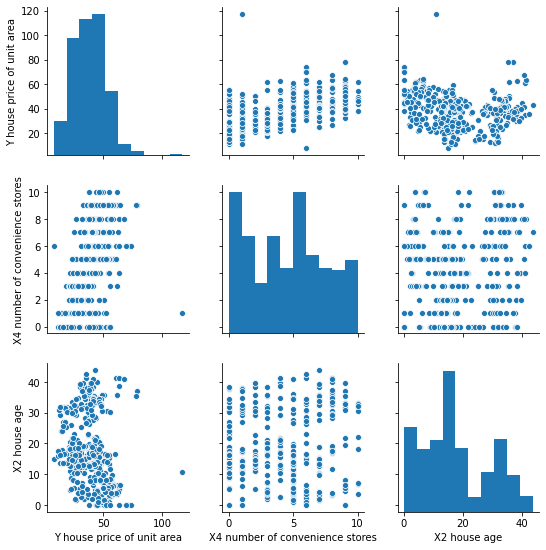

In [131]:
#plot the pair plot of house price,number of convenience stores and house age in data dataframe.
sn.pairplot(data = data, vars=['Y house price of unit area','X4 number of convenience stores','X2 house age'])
plt.show()